In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import colorama
from colorama import Fore



In [2]:
df=pd.read_csv("heart_disease_data.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [3]:
X=df.drop(columns="target",axis=1)
Y=df["target"]

In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()

In [97]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,stratify=Y,random_state=10)

In [130]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [132]:
model=LogisticRegression(max_iter=1000)

In [133]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [134]:
x_pred=model.predict(X_train)

In [135]:
accuracyscore=accuracy_score(x_pred,Y_train)

In [136]:
print(f"Accuracy score for the training data: {accuracyscore}")

Accuracy score for the training data: 0.8471074380165289


In [138]:
y_pred=model.predict(X_test)
accuracyscore_test=accuracy_score(y_pred,Y_test)

In [139]:
print(f"Accuracy score for the test data: {accuracyscore_test}")

Accuracy score for the test data: 0.8852459016393442


In [140]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



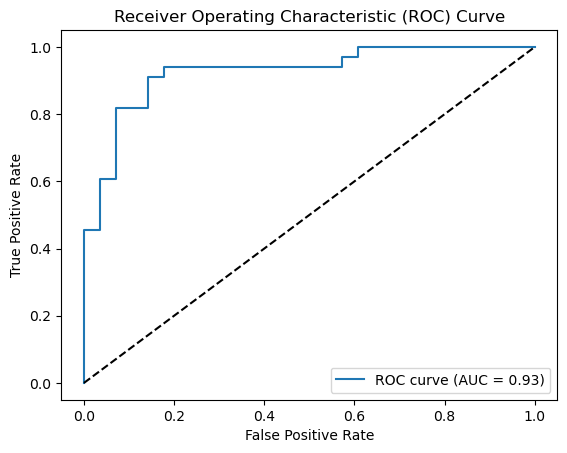

In [142]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [158]:
input_data=(52,1,2,172,199,1,1,162,0,0.5,2,0,3)
input_data_array=np.asarray(input_data)
print("Shape of the input data:",input_data_array.shape)
input_data_reshaped=input_data_array.reshape(1,13)
print("The input data\n",input_data_reshaped)
prediction=model.predict(input_data_reshaped)
if(prediction[0]==1):
    print("The Person have"+Fore.RED+ " Heart Disesase!")
else:
    print("The Person do no have Heart Disease")
    

Shape of the input data: (13,)
The input data
 [[ 52.    1.    2.  172.  199.    1.    1.  162.    0.    0.5   2.    0.
    3. ]]
The Person have Heart Disesase!


D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(13,)


[[ 52.    1.    2.  172.  199.    1.    1.  162.    0.    0.5   2.    0.
    3. ]]


D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


The Person have Heart Disesase!


**Saving The Model

In [149]:
Filename="trained_model.sav"

In [152]:
import pickle
pickle.dump(model,open(Filename,'wb'))

**loading the saved model 

In [153]:
loaded_model=pickle.load(open("trained_model.sav",'rb'))

In [159]:
input_data=(52,1,2,172,199,1,1,162,0,0.5,2,0,3)
+

Shape of the input data: (13,)
The input data
 [[ 52.    1.    2.  172.  199.    1.    1.  162.    0.    0.5   2.    0.
    3. ]]
The Person have Heart Disesase!


D:\Users\Anuj\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
